<a href="https://colab.research.google.com/github/aileeniesta/Computational-Physics/blob/main/ode/ode_2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Integration Code Modular

## Use Functions

In this section, we re-write our Euler code around two functions:
* First, we define a function to return the derivative $f(y,t)$ in our differential equation:  $$\frac{dy}{dt}=f(y,t).$$
* Second, we create a function called `Euler()` that performs the numerical integration

Here are the details for each function.

**Derivative Function:**
* We name our function that returns the derivative in the exponential growth ODE `deriv_exp()1.
* Passed parameters:
    * time
    * dependent variable $y$
    * growth rate parameter $a$
* Returned value:
    * derivative $ay$

**Euler Integration Function**
* We name this function `Euler()`
* Passed parameters:
    * `deriv` = function that returns the derivative defining our ODE
    * `y0` = initial condition for variable `y`
    * `tmax` = upper integration limit in time
    * `params` = tuple containing one or more parameters that will be passed to the derivative function.
* Returned values:
    * `t` = numpy array containing time values in the numerical integration
    * `y` = result of the numerical integration

### 🔆 Example:  Exponential Growth (revised)

In this example, we re-write our exponential growth example using Euler integration and the modular approach described above. Our differential equation is $$\frac{dy}{dt}=ay.$$

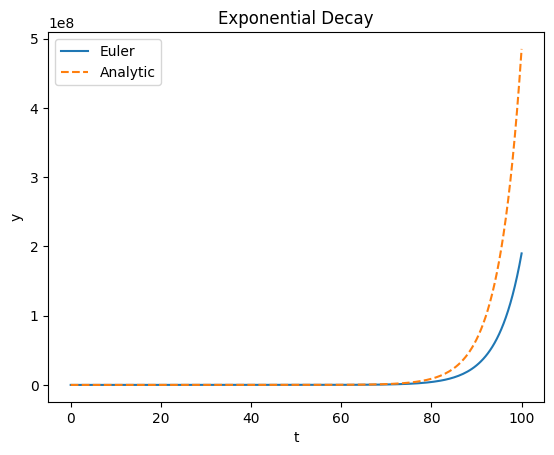

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#########  Derivative Function  #########
#
# This function returns the derivative for the ODE dy/dt = f(y,t)

def deriv_exp(t, y, a):
    return a*y


#########  Euler Integration  #########

def Euler(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    N = int(tmax/dt)+1    # number of steps in simulation
    y = np.zeros((N,1))       # array to store y values
    t = np.zeros(N)       # array to store times

    y[0] = y0             # assign initial value


    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv(t[n], y[n], params)
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y


#########  Parameters  #########

a    = 0.2       # decay constant
tmax = 100       # maximum time
dt   = 0.5       # time step
y0   = 1         # initial value of y

params = a       # bundle derivative parameters together


#########  Perform Euler Integration  #########

t, y =  Euler(deriv_exp, y0, tmax, dt, params)


#########  Analytic Solution  #########

y_true = y0 * np.exp(a*t)


#########  Plot Solution  #########

plt.plot(t, y, label='Euler')
plt.plot(t, y_true, '--', label='Analytic')

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('y')
plt.title("Exponential Decay")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

### ✅ Skill Check 1

In this example, you will solve for the number of photons $n$ in a laser cavity. Use the example above to solve the following ODE for $n(t)$: $$ \frac{dn}{dt} = (GN_0 -k) n- (\alpha G) n^2$$ where $n$ is the number of photons in the laser field and
* $N_0$ = population of photons without laser action
* $G$     = gain coefficient
* $\alpha$ = rate at which atoms return to ground state
* $k$     = rate constant, where $1/k$ = lifetime of photon in laser

Specifications:
* Replace the `deriv_exp()` function with your own function to return the derivative of the number of laser photons
* Hint: the `params` variable will need to be a list containing the values $N_0$, $G$, etc. You'll need to 'bundle' these parameters together in your main program and the 'unpack' them inside your derivatives function.
* Modify the main part of your program to set up and plot the number of photons as a function of time
* You shouldn't have to modify the `Euler()` function

Run your code to produce two plots:
* First plot. Show multiple trajectories for different initial conditions when the pumping steady state $N_0 = 0.5$
    * Plot $n(t)$ for the initial conditions $n_0 = 0, .2, .4, .6, .8, 1.0$  for $N_0 = 0.5$, $G=1$, $\alpha = 1$ and $k=1$.
    * Label each curve with the value $n_0$
    * Label the plot with the value $N_0$
* Second plot. Show multiple trajectories for different initial conditions when the pumping steady state $N_0 = 2.0$
    * Plot $n(t)$ for the initial conditions $n_0 = 0, .2, .4, .6, .8, 1.0$ for $N_0 = 0.5$, $G=1$, $\alpha = 1$ and $k=1$.
    * Label each curve with the value $n_0$
    * Label the plot with the value $N_0$



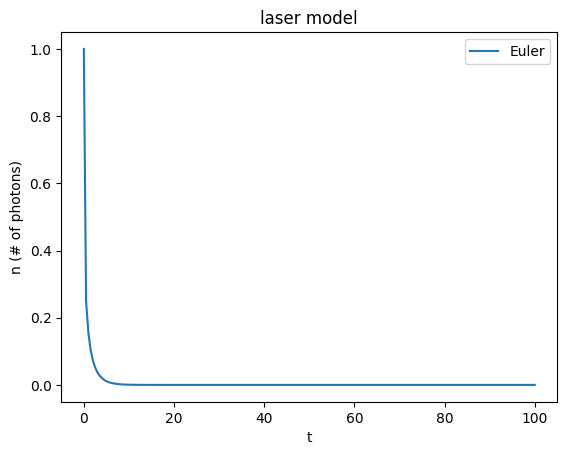

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#########  Derivative Function  #########
#
# This function returns the derivative for the ODE dy/dt = f(y,t)

def deriv_laser(t, n, params):
    N0    = params[0]
    G     = params[1]
    alpha = params[2]
    k     = params[3]
    return ((G*N0-k)*n-(alpha*G)*n**2)


#########  Euler Integration  #########

def Euler(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    N = int(tmax/dt)+1    # number of steps in simulation
    y = np.zeros(N)       # array to store y values
    t = np.zeros(N)       # array to store times

    y[0] = y0             # assign initial value


    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv(t[n], y[n], params)
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y

    n0list = [0,.2,.4,.6,.8,1.0]
    for n in range(n0list):



#########  Parameters  #########

N0      = 0.5             # population of photons without laser action
G       = 1               # gain coefficient
alpha   = 1               # rate at which atoms return to ground state
k       = 1               # rate constant, where 1/𝑘 = lifetime of photon in laser
tmax    = 100             # maximum time
dt      = 0.5             # time step
n0      = 1               # initial value of n

params = np.array([N0, G, alpha, k])


#########  Perform Euler Integration  #########

t, n =  Euler(deriv_laser, n0, tmax, dt, params)


#########  Plot Solution  #########

plt.plot(t, n, label='Euler')
plt.xlabel('t')                  # label the x and y axes
plt.ylabel('n (# of photons)')
plt.title("laser model")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

## Use Arrays to Handle Systems of ODEs

We've already seen one system of ODEs in the previous chapter:  the simple hamonic oscillator.

Second-order ODE's arise naturally from Newton's second law since acceleration is a second order derivative:
$$\frac{d^2x}{dt^2}=a = \frac{F}{m}$$
where the acceleration is potentially a function of position, velocity, time and mass:  $a=F(x, v, t)/m$.

As discussed in the lecture slides, we write this second-order equation as two first-order equations like this:
$$ \frac{dx}{dt} = v $$

$$ \frac{dv}{dt} = \frac{a}{m}. $$

We can write this system of ODEs as a single vector equation, where the components of the generalized vector are position and velocity. If we define our generalized vector as $\vec{y}$, its components will be $$y_0(t) = x(t)$$ and $$y_1(t) = v(t).$$ The vector $\vec{y}$ may be written as
 $$\vec{y} = \begin{pmatrix}y_0(t) \\ y_1(t) \end{pmatrix} = \begin{pmatrix}x \\ v \end{pmatrix}.$$

 With these substitutions, we can write our system of coupled ODEs as
 $$ \frac{dy_0}{dt} = y_1 $$
$$ \frac{dy_1}{dt} = -(k/m)y_0. $$

Our system of differential equations may now be written as a single vector equation:
$$\frac{d\vec{y}}{dt}=\vec{a}(\vec{y},t),$$ where $\vec{a}(\vec{y},t)$ is a vector-valued acceleration:
$$\vec{a}(\vec{y},t)= \begin{pmatrix}v \\ -(k/m)x \end{pmatrix} = \begin{pmatrix}y_1 \\ -(k/m)y_0\end{pmatrix}.$$

We can now apply our favoriate numerical integration method to this single vector-valued ODE. For example the Euler update rule for our generalized state vector would be:
$$ \vec{y}_{n+1} = \vec{y}_n + \vec{a}_n \Delta t.$$



### 🔆 Example:  Vectorized SHO example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#########  Derivative Function  #########
#
# This function returns the derivatives for the ODE dy/dt = f(y,t)

def deriv_sho(t, y, params):

    # extract variables from y array
    x = y[0]          # position
    v = y[1]          # velocity

    # extract parameters from param array
    m = params[0]     # mass
    k = params[1]     # spring constant

    # calculate derivatives
    dxdt = v
    dvdt = -k/m*x

    # return derivatives in a numpy array
    return np.array([dxdt, dvdt])


#########  Euler Integration  #########

def Euler(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    # determine the number of variables in the system from initial conditions
    nvar = 1 if not isinstance(y0, np.ndarray) else y0.size

    N = int(tmax/dt)+1         # number of steps in simulation
    y = np.zeros((N,nvar))     # array to store y values
    t = np.zeros(N)            # array to store times

    if nvar == 1:
        y[0] = y0              # assign initial value if single variable
    else:
        y[0,:] = y0            # assign vector initial values if multivariable

    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv(t[n], y[n], params)
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y


#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 10        # maximum time
dt   = 0.001     # time step
x0   = 1         # initial position
v0 = 0           # initial velocity

params = np.array([m,k])    # bundle derivative parameters together
y0 = np.array([x0,v0])      # bundle initial conditions together


#########  Perform Euler Integration  #########

t, y =  Euler(deriv_sho, y0, tmax, dt, params)

x = y[:,0]       # extract positions
v = y[:,1]       # extract velocities


#########  Plot Solution  #########

plt.plot(t, x, label='x')        # plot position
plt.plot(t, v, '--', label='v')  # plot velocity

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('x, v')
plt.title("SHO")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

### ✅ Skill Check 2

Write code to model the motion of a mass attached to a pivot by a spring with spring constant $k$ immersed in a fluid with fluid drag coefficient $b$. Assume the mass can move in the x-y plane.
* Create a derivative function to return the four relevant derivatives:  $dx/dt$, $dy/dt$, $dv_x/dt$, $dv_y/dt$ using:
$$\frac{dx}{dt} = v_x$$
$$\frac{dy}{dt} = v_x$$
$$\frac{dv_x}{dt} = -\frac{kx-bv_x}{m} $$
$$\frac{dv_y}{dt} = -\frac{ky-bv_y}{m} $$
* Make a panel of 6 plots (two columns and three rows) showing the path $(x,y)$ of the mass for different combinations of initial conditions and parameters ($k$, $m$, $b$).
* Scale your plots so they have equal axis scaling.
* Label each subplot with relevant information (so the viewer can see what changed between the plots).


In [ ]:
# your code here